![](fc.PNG)

# [FastCampus] 파이썬을 활용한 이커머스 데이터 분석하기

## Ch02. 고객별 연간 예측 지출액 예측

패스트 캠퍼스의 좋은 강의가 있어 이것을 따라해 보면서 기록을 남겨 보았다. 

### 1. 모듈 및 데이터 로딩하기

먼저 항상 사용하는 4가지 모듈을 미리 임포트 한다.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

먼저 데이터를 불러오자.

In [4]:
data = pd.read_csv('ecommerce.csv')

In [5]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


head()는 데이터 프레임의 앞부분 5개 까지만 출력해준다.

In [6]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


컬럼이 뜻하는 바를 확인해보자.

- Email : 고객의 이메일 주소
- Address : 고객이 사는 주소
- Avatar : 고객의 아바타 캐릭터
- Avb.Session Length : 고객의 접속한 시간의 평균
- Time on App : 어플리케이션에서 사용한 시간
- Time on Website : 웹 사이트에서 사용한 시간
- Length of Membership : 고객의 맴버쉽 가입 기간
- Yearly Amount Spent : 고객이 연간 쓴 금액


데이터의 컬럼을 살펴본 결과 우리는 Yearly Amount Spent를 예측해야 한다는 것을 알 수 있다.

### 2. 데이터 특성 확인하기

info() 메서드로 각 컬럼의 정보를 확인해 보자.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


전체 컬럼의 결측값이 한 개도 없다는 것을 확인할 수 있다.

- object : text로 된 정보들
- float64 : 숫자로 된 정보들 (소수점이 들어있는 숫자)

describe() 메서드로는 각 컬럼의 전반적인 수치들을 알 수 있다. 이러한 스케일들을 확인하면 데이터를 분석하는데 도움이 된다.

In [8]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


outlier가 있을 때는 75%의 값과 max의 값의 차이가 일관적이지 않고 많이 나게 된다. 

### 3. 불필요한 변수 버리기

먼저 불필요한 변수를 버리는 작업이 필요하다. 머신러닝을 사용할 때는 텍스트 데이터를 확인해 봐야한다. 모델링에 있어 의미가 없으면 사용하지 않는 것이 좋다.

Yearly Amount spent를 예측하는데 있어 text 데이터인 Email, Address, Avatar는 필요가 없어보인다.

아래의 코드를 입력하면 text 데이터들이 떨어져 나가고 숫자 데이터만 남게 된다.

In [12]:
data = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]

In [13]:
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### 4. Trian, Test set 나누기

새로운 데이터를 테스트하기 전에 가지고 있는 데이터에서 20 ~ 30 % 테스트 데이터를 떼어논 다음 남아있는 70 ~ 80 % 데이터로 훈련을 한다. 그리고 나서 떼어 놓았던 20 ~ 30 %의 데이터를 새로운 데이터인 마냥 테스트를 하게 된다. 20 ~ 30 % 떼어낸 데이터는 이미 알고 있어 모델링 한 결과가 훈련 set 에만 잘 맞는지 미래에 다가올 데이터에도 잘 작동을 하는지 볼 수 있게된다. 

sklearn의 하위 모델인 model_selection 을 입력한 후 train_test_split을 임포트 한다. 아래 코드처럼 모듈을 불러와야 메모리 낭비를 하지 않게 된다.

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


X는 독립변수, y는 종속변수를 의미한다. X는 우리가 예측에 필요한 데이터인 'Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent' 이고,  y는 Yearly Amount Spent이다.

In [23]:
X = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [24]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [25]:
y = data['Yearly Amount Spent']

In [26]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

![](fcd.PNG)

In [28]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
332,33.144234,11.737041,37.935189,2.190132
68,32.430758,11.306232,37.680403,2.779521
175,33.308572,11.691686,37.480912,1.715777
391,33.481931,11.918670,37.317705,3.336339
84,34.655486,10.338073,36.157256,4.396652
...,...,...,...,...
177,34.713451,11.724002,36.813858,4.087837
207,33.324241,11.084584,36.776017,4.746990
233,32.004753,11.395209,37.332814,3.803365
176,32.332637,11.548761,38.576516,4.773503


77%의 데이터가 train 데이터가 나뉘어져 375개의 row와 4개의 컬럼으로 나뉘어진 것을 볼 수 있다. train 데이터와 test 데이터의 사이즈를 지정해 줄 수 있다. default 값은 test data에 33%가 들어가게 지정되어 있다. 아래 코드 처럼 사이즈 지정을 할 수 있다. 데이터가 엄청 많다면 6:4 정도로 나누어도 train 데이터가 많아 훈련하는데 무리가 없지만 데이터의 양이 적으면 8:2나 9:1 로 훈련 데이터 테스트 데이터를 나누는게 훈련하는데 무리가 없다.

random_state는 굳이 안써도 되지만 꼭 써야 하는 이유는 random하게 데이터를 섞기 때문에 다른 사람이 분석할 때 같은 값을 얻기 위함이다. 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100 )

In [31]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
205,34.967610,13.919494,37.952013,5.066697
404,32.278443,12.527472,36.688367,3.531402
337,31.827979,12.461147,37.428997,2.974737
440,33.200616,11.965980,36.831536,3.549036
55,33.925297,11.588655,35.252242,3.392050
...,...,...,...,...
343,32.302748,12.815393,37.957810,4.615426
359,32.054262,13.149670,37.650400,4.195614
323,32.762456,10.952353,37.646292,4.019470
280,32.271848,13.485009,37.550880,3.086337


### 5. 리니어 리그레션 모델 만들기

리니어 리그레션을 부를수 있는 모델은 여러 종류가 있다.(오픈소스이기 때문) 여기에선 statsmodels로 모델을 불러오자.

In [32]:
import statsmodels.api as sm

In [33]:
model = sm.OLS(y_train, X_train)

OLS모듈안에 데이터를 넣어주어야 한다. 원래는 X를 먼저 넣어주어야하지만 이 모듈은 y를 먼저 넣어주어야한다.

모델을 훈련하기 위해 model.fit() 메서드를 사용한다.

In [35]:
model = model.fit()

결과를 보기위해 summary() 메서드를 사용한다. 위에서 statsmodule안의 OLS 모듈을 불러온 이유는 summary()를 아래와 같이 보기좋게 잘 표현해 주기 때문이다.


In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.798e+04
Date:                 Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                         16:21:26   Log-Likelihood:                         -1820.0
No. Observations:                  400   AIC:                                      3648.
Df Residuals:                      396   BIC:                                      3664.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.9059      0.869     13.696      0.000      10.197      13.615
Time on App             34.3257      1.121     30.610      0.000      32.121      36.530
Time on Website        -14.1405      0.812    -17.405      0.000     -15.738     -12.543
Length of Membership    61.0149      1.144     53.318      0.000      58.765      63.265
==============================================================================
Omnibus:                        0.490   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.606
Skew:                          -0.022   Prob(JB):                        0.739
Kurtosis:                       2.814   Cond. No.                         55.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squeare : 클수록 좋은 모델, Adj.가 더욱 적절한 평가기준이다.
- Coef : 변수의 영향력 (강도와 방향)
- P-value : 신뢰할 수 있는 결과인가에 대한 척도이다. 0.05 이하면 양호하다 판단한다.


### 6. 모델을 활용하여 예측하고 평가하기

predict() 메서드를 이용하여 예측을 해보자.

In [40]:
pred = model.predict(X_test)

In [41]:
pred

69     418.211323
29     567.097473
471    534.706617
344    425.690888
54     474.931682
          ...    
460    570.877250
152    564.267305
154    557.093996
56     489.285778
392    550.720695
Length: 100, dtype: float64

위 처럼 예측값이 나왔다. 이것을 이미 알고 있는 값인 y_test와 비교할 수 있다.

In [38]:
y_test

69     451.575685
29     554.722084
471    541.049831
344    442.722892
54     522.404141
          ...    
460    618.845970
152    555.892595
154    595.803819
56     520.898794
392    549.131573
Name: Yearly Amount Spent, Length: 100, dtype: float64

예측값과 약간 차이가 나는 것을 알 수 있다. 이렇게 비교를 하면 얼마나 좋은지 나쁜지 알 수가 없어 여러가지 방법을 통해 비교해 보자.

비교방법의 첫 번째로 그림을 그려 비교해 보자.

<AxesSubplot:xlabel='Yearly Amount Spent'>

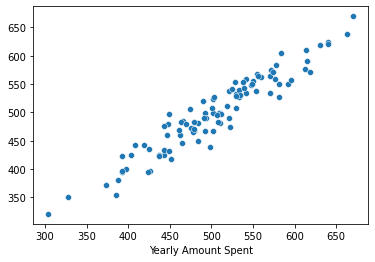

In [43]:
sns.scatterplot(x=y_test, y=pred)

x축과 y축의 비율이이 안맞아서 아래와 같이 비율을 맞추는 코드를 입력하여 다시 실행해 보자.

<AxesSubplot:xlabel='Yearly Amount Spent'>

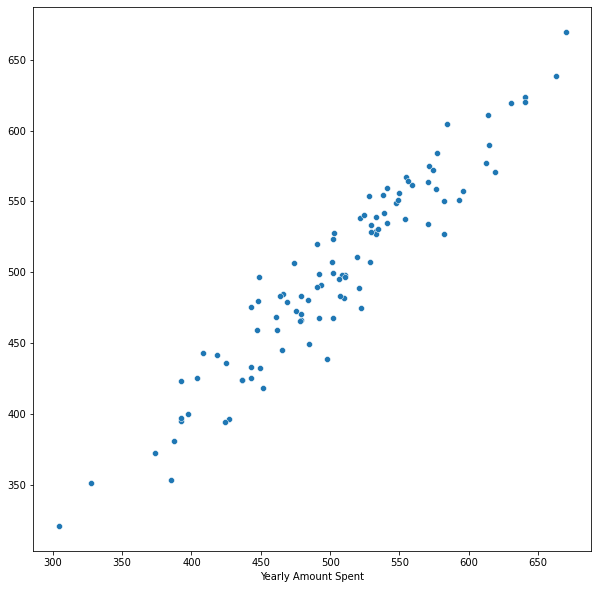

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test, y=pred)

위 그림을 확인해 보면 완전히 일치하지는 않지만 어느정도 예측이 잘 된거라 볼수 있다. 예측이 잘못되었다면 점들이 사방팔방으로 찍혀 있을 것이다.

### MSE (Mean Squared Error)

MSE란 실제값과 예측값의 차이를 얘기해 준다. 이 차이가 얼마나 나느냐에 따라 예측이 잘되었는지 안되었는지 수치화 해서 설명해 줄 수 있다. 이 차이는 작을 수록 좋다. 이것을 MSE 방법으로 수치화 해보자.

이 에러들을 모두 합해서 평균하면 문제가 생기는데 실제값에서 예측값을 빼거나 예측값에서 실제값을 빼면 방향성에서 문제가 생길 수 있다. 즉 마이너스가 생겨 플러스가 된 에러와 상쇄되어 0에 가까워진다. 그렇게 되면 차이를 정확하게 알 수 가 없다.

따라서 절댓값을 쓰거나 제곱을 사용하여 이 문제를 해결할 수 있다. MSE는 제곱을 사용하는 방법이다.

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mean_squared_error(y_test,pred)

482.28901390889973

482.289라는 수치가 나오는데 이것이 좋은지 나쁜지는 알 수 없다. 다른 모델과 비교했을 때 어떤 모델의 MSE가 낮은지를 보고 판단할 수 있지만 이 수치로서는 정확하게 판단할 수 는 없다. 즉 상대적인 수치라고 보면 된다.

이번엔 MSE보다 한단계 더 자주 쓰이는 방법을 알아보자.

### RMSE(Root Mean Squared Error)


RMSE는 MSE에다가 루트를 씌워주는 방법이다. 이 방법이 왜 좋냐면 MSE는 제곱을 함으로써 에러값이 껑충 뛰어 계산이 된다. 위의 482라는 숫자가 원래 있던 y값의 스케일에 비해 커진 느낌을 준다. 따라서 이 차이를 줄이기 위해 루트를 씌워준다. 여러 방법이 있지만 아래의 코드를 따라해보자.

In [48]:
np.sqrt(mean_squared_error(y_test,pred))

21.961079525125804

21.96 정도의 값이 RMSE 값이다. describe()로 확인해 보았던 Yearly Amount Spent의 mean값이 499였는데 여기서 21정도의 에러가 보인다로 해석할 수 있다. 예측치와 실제 데이터 값이 21 정도의 차이가 난다. 하지만 역시 Rmse도 모델간이 비교하기 위한 상대적인 수치라는 것을 명심하자. 즉 좋은지 나쁜지는 알 수 없다는 것이다.

출처 : [패스트캠퍼스](파이썬을 활용한 이커머스 데이터 분석)